## Преобразование признаков

### Нормализация признаков

MINMAXSCALER

In [1]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

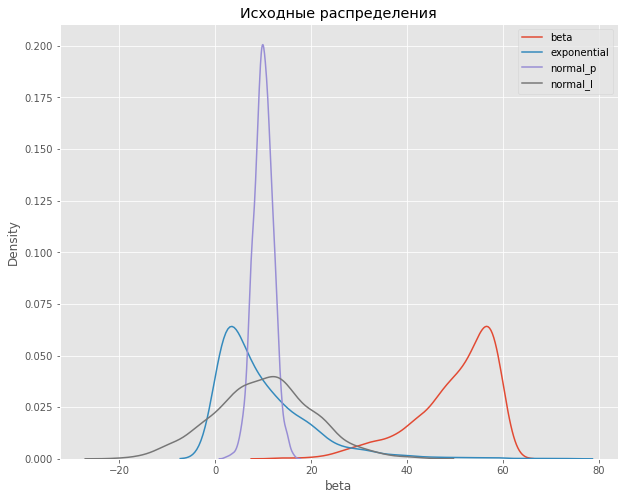

In [2]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [3]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


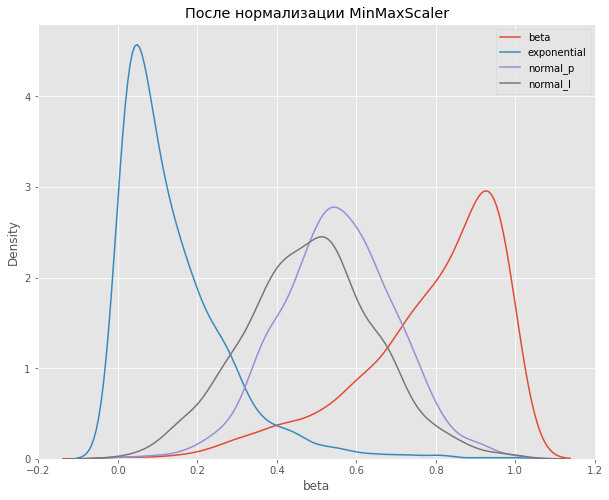

In [4]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1, label='beta')
sns.kdeplot(df_mm['exponential'], ax=ax1, label='exponential')
sns.kdeplot(df_mm['normal_p'], ax=ax1, label='normal_p')
sns.kdeplot(df_mm['normal_l'], ax=ax1, label='normal_l')
plt.legend()

In [5]:
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


ROBUSTSCALER

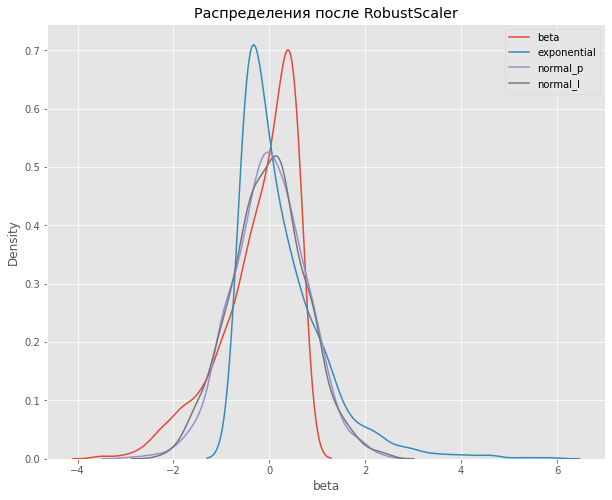

In [6]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1, label='beta')
sns.kdeplot(df_r['exponential'], ax=ax1, label='exponential')
sns.kdeplot(df_r['normal_p'], ax=ax1, label='normal_p')
sns.kdeplot(df_r['normal_l'], ax=ax1, label='normal_l')
plt.legend()

In [7]:
df_r.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


### Стандартизация признака

STANDARDSCALER

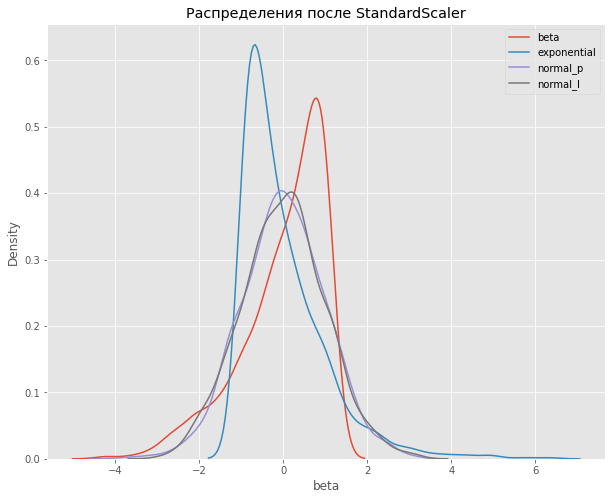

In [8]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_st = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_st = pd.DataFrame(df_st, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_st['beta'], ax=ax1, label='beta')
sns.kdeplot(df_st['exponential'], ax=ax1, label='exponential')
sns.kdeplot(df_st['normal_p'], ax=ax1, label='normal_p')
sns.kdeplot(df_st['normal_l'], ax=ax1, label='normal_l')
plt.legend()

In [9]:
df_st.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


Задание 6.4
<br>
Нормализуйте признак price. Используйте подходящий тип нормализации.
<br>
В ответе напишите результат выполнения кода <i>data['price'].sum()</i>, округлённый до целого.

In [10]:
df_test = pd.read_csv('data/wine_cleared.csv') # Загрузка данных из файла в переменную, создание объекта DataFrame

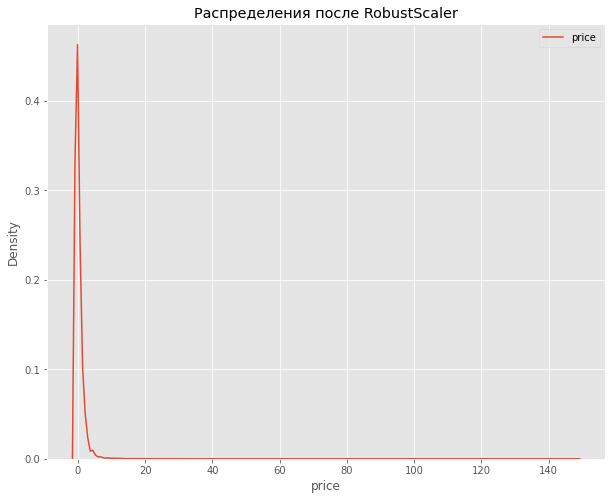

In [11]:
# Из датасета винных обзоров создаем Series с колнкой price
df_norm = df_test['price']

# Преобразуем Series в DataFrame
df_norm = pd.DataFrame(df_norm)

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df_norm.columns)

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_robust = r_scaler.fit_transform(df_norm)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_robust = pd.DataFrame(df_robust, columns=col_names)
df_robust['price'].sum()
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_robust['price'], ax=ax1, label='price')
plt.legend()

In [12]:
df_robust.describe()

,price
count,129971.000000
mean,0.334700
std,1.798958
min,-1.090909
25%,-0.454545
50%,0.000000
75%,0.545455
max,148.727273


In [13]:
round(df_robust['price'].sum())

43501

Задание 6.5
<br>
Стандартизируйте исходный признак price.
<br>
В ответе напишите результат выполнения кода <i><b>data['price'][129968]</b></i>. Ответ округлите до сотых.

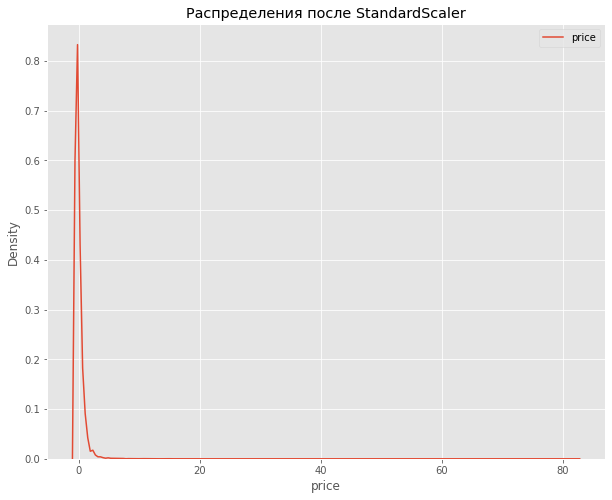

In [14]:
# Из датасета винных обзоров создаем Series с колнкой price
df_stand = df_test['price']

# Преобразуем Series в DataFrame
df_stand = pd.DataFrame(df_stand)

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df_stand.columns)

# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_standard = s_scaler.fit_transform(df_stand)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_standard = pd.DataFrame(df_standard, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_standard['price'], ax=ax1, label='price')
plt.legend()

In [15]:
round(df_standard['price'][129968], 2)

-0.14

Задание 7.4 (Самопроверка)
<br>
Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.
<br>
❗️ Удалять признак рейтинг — points нельзя!
<br>
❗️ Для простоты вычислений можете использовать только корреляцию Пирсона.

<AxesSubplot:>

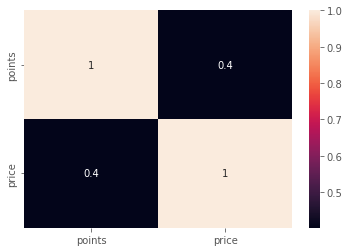

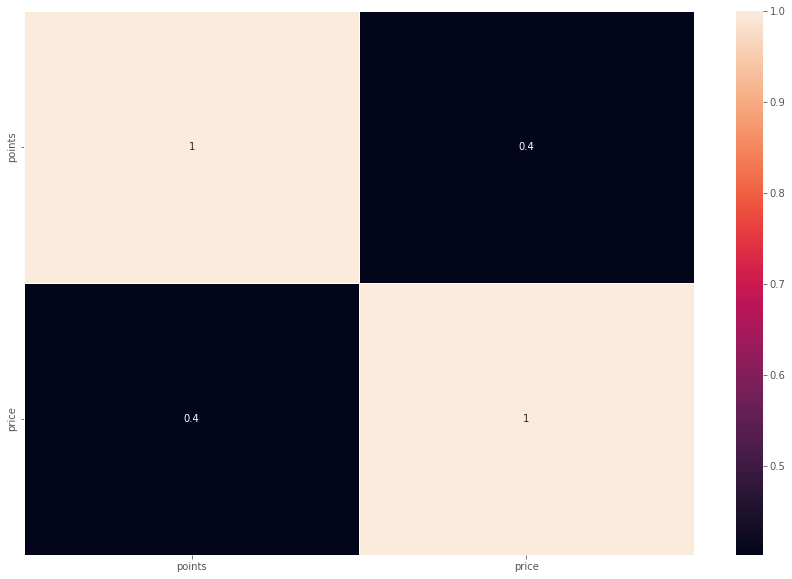

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_wine = pd.read_csv('data/wine_cleared.csv') # Загрузка данных из файла в переменную, создание объекта DataFrame

sns.heatmap(df_wine.corr(), annot=True)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_wine.corr(), annot=True, linewidths=.5, ax=ax)

In [18]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129971 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129971 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129971 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB
